In [1]:
!unzip /content/recordings.zip

Archive:  /content/recordings.zip
   creating: recordings/
  inflating: recordings/ClassicFM_20250308_151310.mp3  
  inflating: recordings/ClassicFM_20250310_202931.mp3  
  inflating: recordings/ClassicFM_20250310_203247.mp3  
  inflating: recordings/ClassicFM_20250310_203606.mp3  
  inflating: recordings/ClassicFM_20250310_203743.mp3  
  inflating: recordings/ClassicFM_20250310_204054.mp3  
  inflating: recordings/ClassicFM_20250310_204401.mp3  
  inflating: recordings/NPR_News_20250308_151237.mp3  
  inflating: recordings/NPR_News_20250308_151452.mp3  
  inflating: recordings/NPR_News_20250310_202856.mp3  
  inflating: recordings/NPR_News_20250310_203110.mp3  
  inflating: recordings/NPR_News_20250310_203454.mp3  
  inflating: recordings/NPR_News_20250310_203713.mp3  
  inflating: recordings/NPR_News_20250310_203920.mp3  
  inflating: recordings/NPR_News_20250310_204301.mp3  
  inflating: recordings/SomaFM_Groove_20250308_151431.mp3  
  inflating: recordings/SomaFM_Groove_20250310_20

# Dataset Name: Stream30, a dataset of public audio recordings

## Recording, plot waveforms and spectograms

Total recordings: 22
ClassicFM_20250310_204401.mp3 - Duration: 30.00s


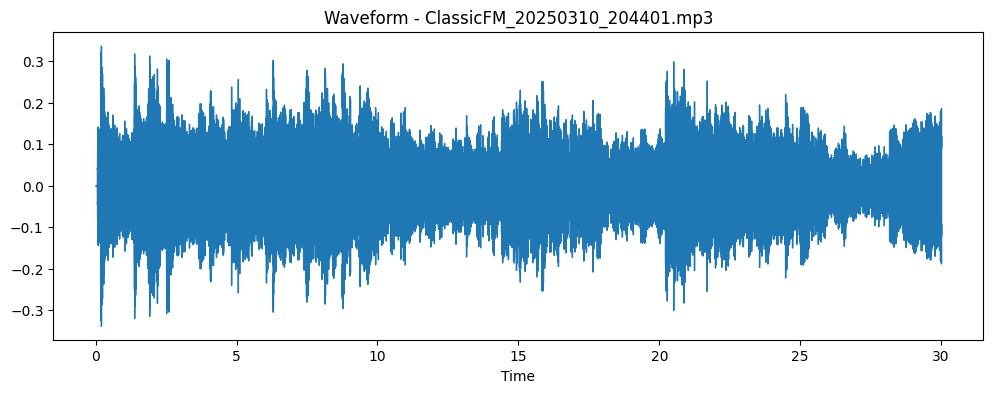

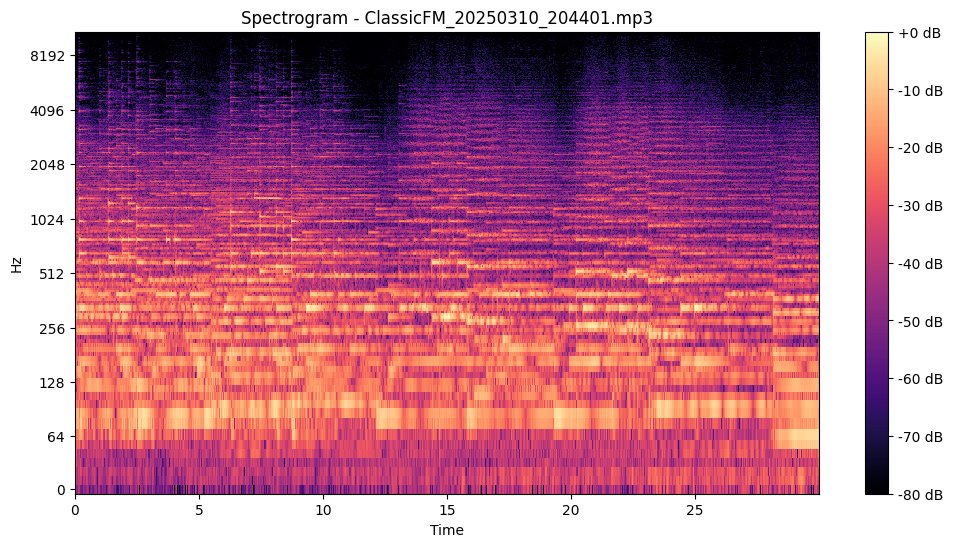

ClassicFM_20250310_204401.mp3 - Mean Zero Crossing Rate: 0.0426
ClassicFM_20250310_204401.mp3 - Mean Spectral Centroid: 873.78
SomaFM_Groove_20250308_151431.mp3 - Duration: 30.00s


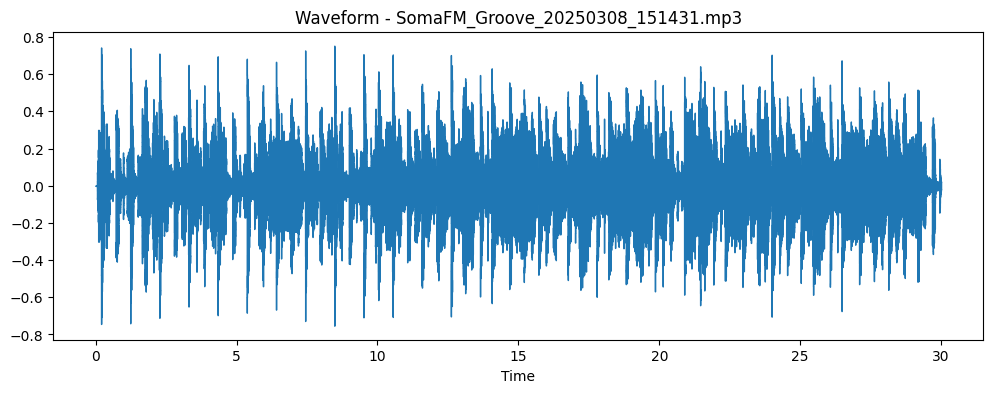

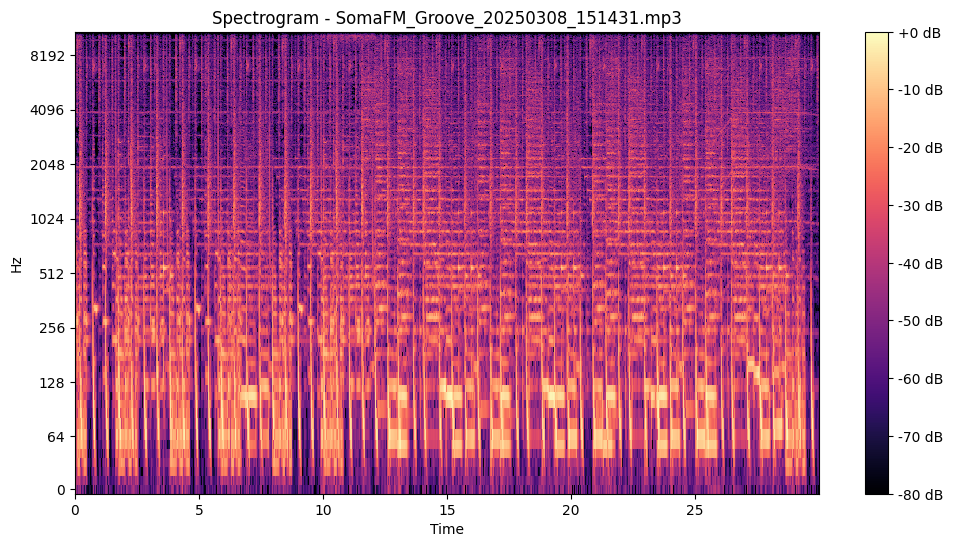

SomaFM_Groove_20250308_151431.mp3 - Mean Zero Crossing Rate: 0.1287
SomaFM_Groove_20250308_151431.mp3 - Mean Spectral Centroid: 2902.15
NPR_News_20250310_203454.mp3 - Duration: 60.00s


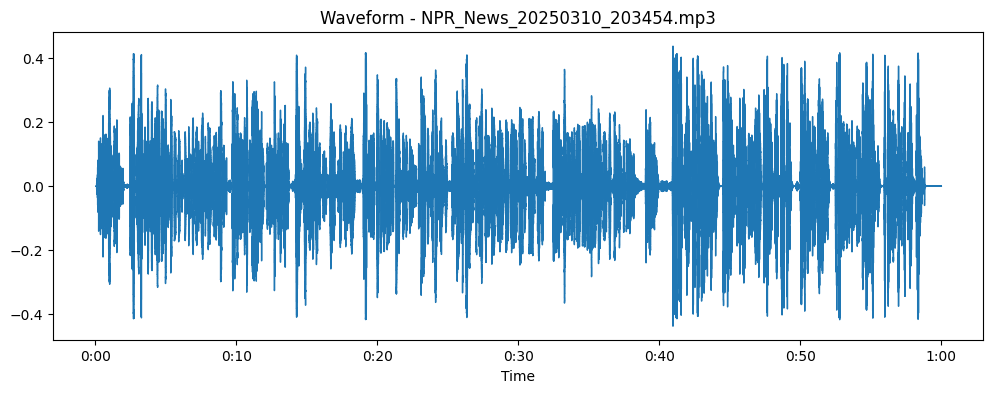

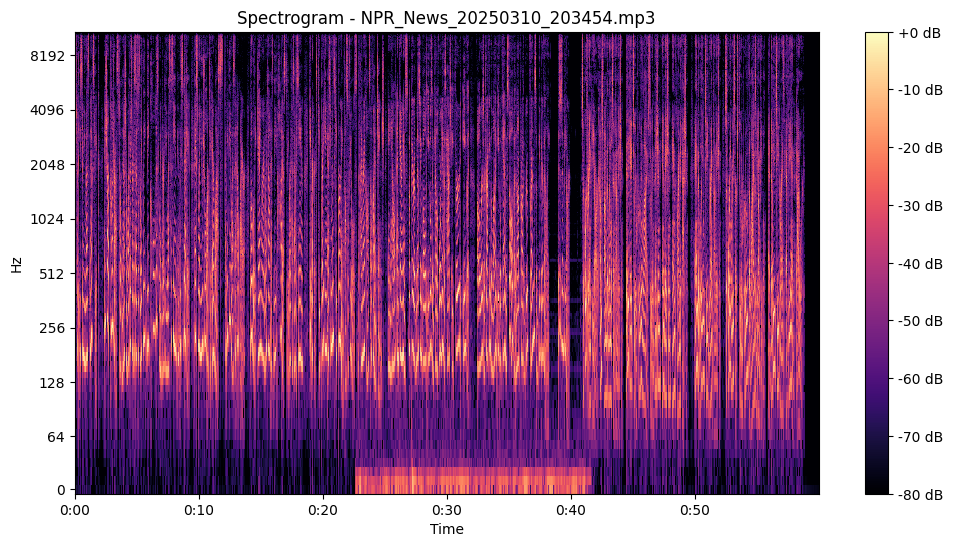

NPR_News_20250310_203454.mp3 - Mean Zero Crossing Rate: 0.1372
NPR_News_20250310_203454.mp3 - Mean Spectral Centroid: 2455.90
SomaFM_Groove_20250310_204419.mp3 - Duration: 60.00s


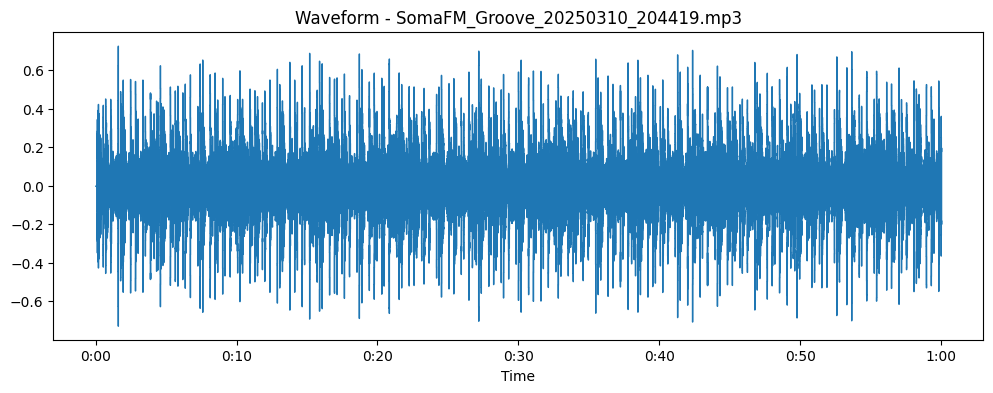

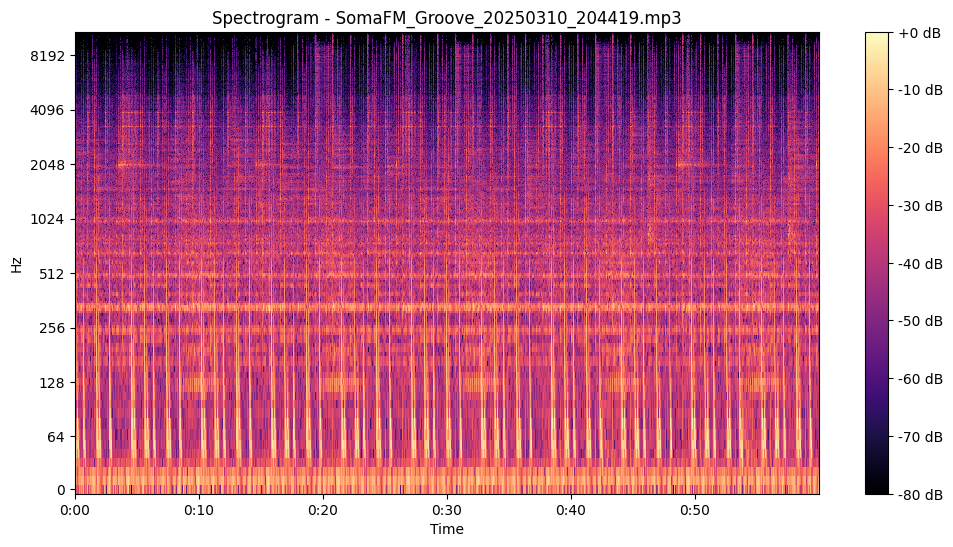

SomaFM_Groove_20250310_204419.mp3 - Mean Zero Crossing Rate: 0.0720
SomaFM_Groove_20250310_204419.mp3 - Mean Spectral Centroid: 1661.87
NPR_News_20250310_202856.mp3 - Duration: 30.00s


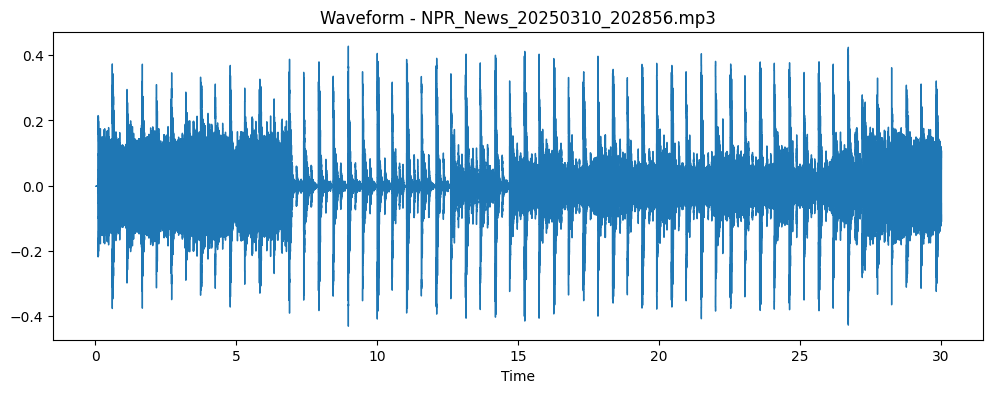

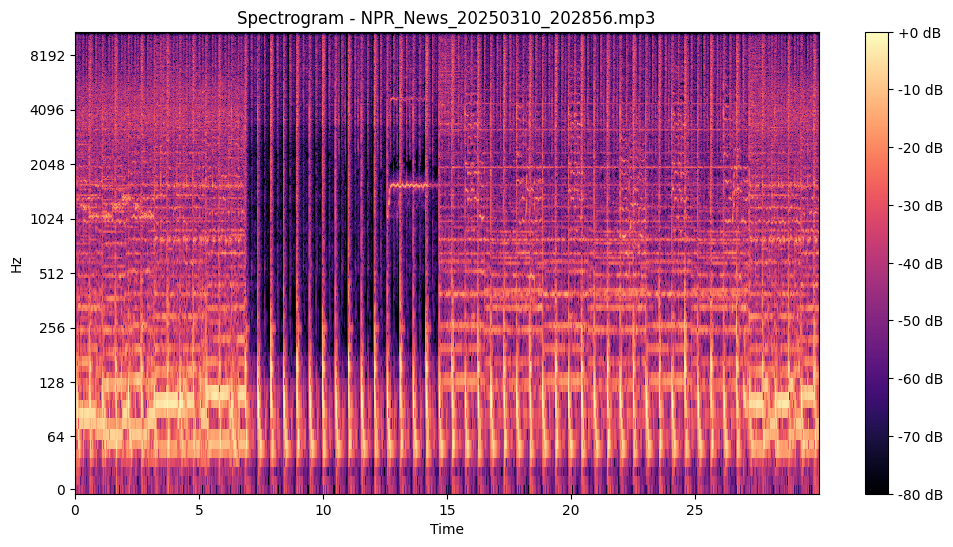

NPR_News_20250310_202856.mp3 - Mean Zero Crossing Rate: 0.1729
NPR_News_20250310_202856.mp3 - Mean Spectral Centroid: 3667.38


In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

recordings_folder = '/content/recordings'

recordings = [f for f in os.listdir(recordings_folder) if f.endswith('.mp3')]
print(f'Total recordings: {len(recordings)}')

for i, recording in enumerate(recordings[:5]):
    path = os.path.join(recordings_folder, recording)
    y, sr = librosa.load(path)
    duration = librosa.get_duration(y=y, sr=sr)
    print(f'{recording} - Duration: {duration:.2f}s')

    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {recording}')
    plt.show()

    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {recording}')
    plt.show()

    zcr = librosa.feature.zero_crossing_rate(y)
    print(f'{recording} - Mean Zero Crossing Rate: {np.mean(zcr):.4f}')

    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    print(f'{recording} - Mean Spectral Centroid: {np.mean(spectral_centroid):.2f}')


## Some example audios

In [4]:
from IPython.display import Audio


audio_path = os.path.join(recordings_folder, recordings[0])
Audio(audio_path)


In [5]:
audio_path = os.path.join(recordings_folder, recordings[1])
Audio(audio_path)


## Comparing recordings across different sources

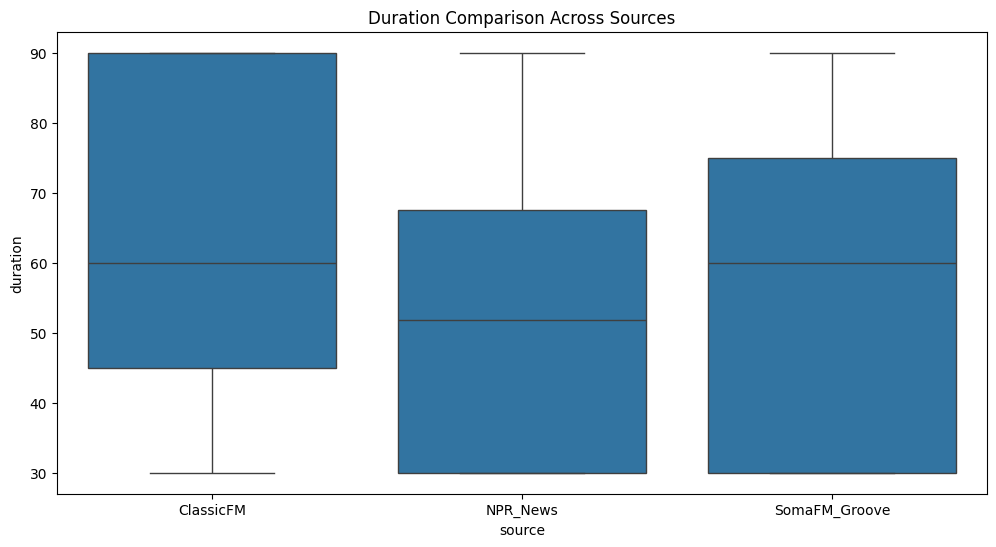

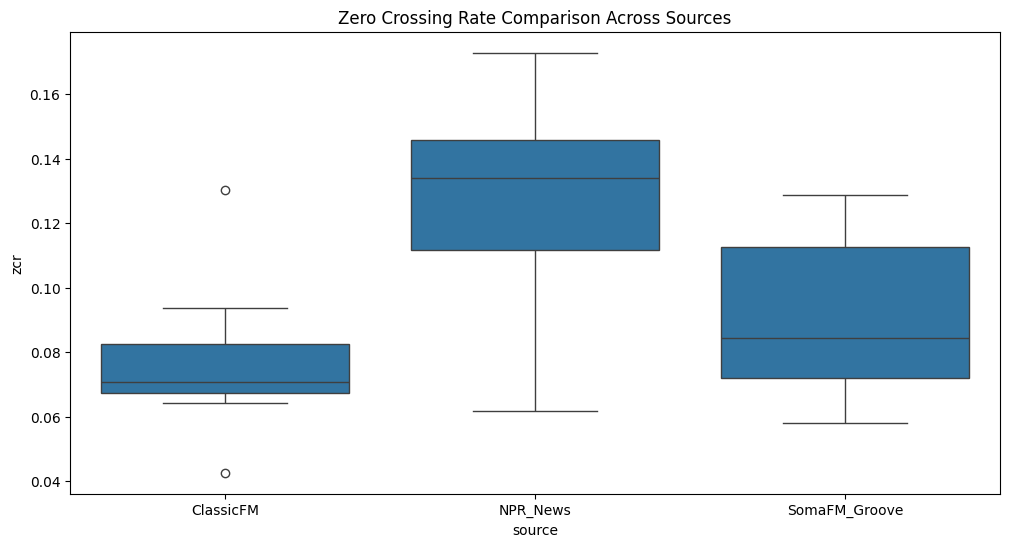

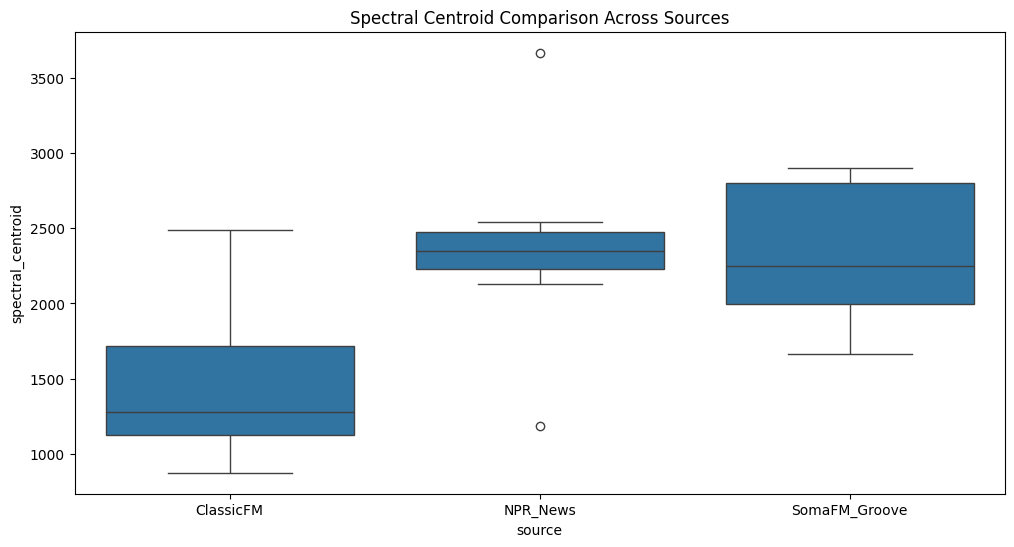

In [6]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

recordings_folder = '/content/recordings'

recordings = [f for f in os.listdir(recordings_folder) if f.endswith('.mp3')]
sources = {'ClassicFM': [], 'NPR_News': [], 'SomaFM_Groove': []}

for recording in recordings:
    for source in sources:
        if source in recording:
            sources[source].append(recording)

features = {'source': [], 'duration': [], 'zcr': [], 'spectral_centroid': []}

for source, files in sources.items():
    for recording in files:
        path = os.path.join(recordings_folder, recording)
        y, sr = librosa.load(path)
        duration = librosa.get_duration(y=y, sr=sr)
        zcr = np.mean(librosa.feature.zero_crossing_rate(y))
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        features['source'].append(source)
        features['duration'].append(duration)
        features['zcr'].append(zcr)
        features['spectral_centroid'].append(spectral_centroid)

import pandas as pd
features_df = pd.DataFrame(features)

plt.figure(figsize=(12, 6))
sns.boxplot(x='source', y='duration', data=features_df)
plt.title('Duration Comparison Across Sources')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='source', y='zcr', data=features_df)
plt.title('Zero Crossing Rate Comparison Across Sources')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='source', y='spectral_centroid', data=features_df)
plt.title('Spectral Centroid Comparison Across Sources')
plt.show()

## Clustering and Classification

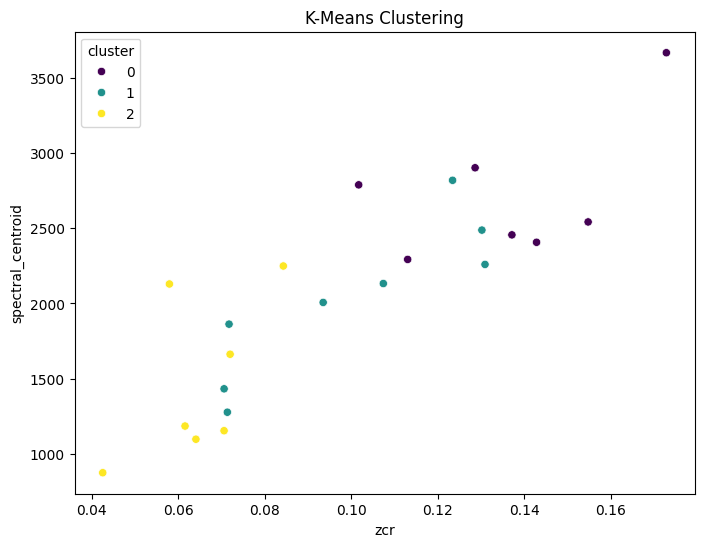

[[1 2 0]
 [0 1 1]
 [1 1 0]]
               precision    recall  f1-score   support

    ClassicFM       0.50      0.33      0.40         3
     NPR_News       0.25      0.50      0.33         2
SomaFM_Groove       0.00      0.00      0.00         2

     accuracy                           0.29         7
    macro avg       0.25      0.28      0.24         7
 weighted avg       0.29      0.29      0.27         7



In [8]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

recordings_folder = '/content/recordings'
recordings = [f for f in os.listdir(recordings_folder) if f.endswith('.mp3')]
sources = {'ClassicFM': [], 'NPR_News': [], 'SomaFM_Groove': []}

for recording in recordings:
    for source in sources:
        if source in recording:
            sources[source].append(recording)

features = {'source': [], 'duration': [], 'zcr': [], 'spectral_centroid': []}

for source, files in sources.items():
    for recording in files:
        path = os.path.join(recordings_folder, recording)
        y, sr = librosa.load(path)
        duration = librosa.get_duration(y=y, sr=sr)
        zcr = np.mean(librosa.feature.zero_crossing_rate(y))
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        features['source'].append(source)
        features['duration'].append(duration)
        features['zcr'].append(zcr)
        features['spectral_centroid'].append(spectral_centroid)

features_df = pd.DataFrame(features)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df[['duration', 'zcr', 'spectral_centroid']])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
features_df['cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_df['zcr'], y=features_df['spectral_centroid'], hue=features_df['cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Classification
X_train, X_test, y_train, y_test = train_test_split(scaled_features, features_df['source'], test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
